In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
from scipy import stats

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['font.size'] = 10

# Modelado y Forecasting
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.utils import save_forecaster

from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import  KNeighborsRegressor
from sklearn import linear_model
from sklearn.model_selection import KFold, cross_val_score, train_test_split

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.ar_model import AutoReg

from skforecast.utils import load_forecaster

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from keras import optimizers,callbacks
from keras.models import Sequential, Model
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten, Dropout, MultiHeadAttention, GlobalAveragePooling1D, Input

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler

# Calculo de metricas
# ==============================================================================
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error
from sklearn import metrics

# Configuración warnings
# ==============================================================================
import warnings
pd.options.mode.chained_assignment = None  # default='warn'
# warnings.filterwarnings('ignore')

In [2]:
# Common code for display result
def show_graph(df1,df2,title):
    data = pd.concat([df1, df2])
    data.reset_index(inplace=True, drop=True)
    for col in data.columns:
        if col.lower().startswith('pred'):
            data[col].plot(label=col,linestyle="dotted")
        else:
            data[col].plot(label=col)
    plt.title(title)
    plt.legend()
    plt.show()

In [3]:
def evaluacion_metrica(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE: {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE: {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE: {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2: {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [4]:
# Carga de datos
# ==============================================================================
folder = "C:\\Users\\Martinejo\\Documents\\UMH\\INVESTIGACION\\MARGARITA_SALAS\\Sistema_Riego\\"
parametro = 'eto'
output=parametro
inputs_sen = [
          'fecha', 'eto','viento_med','precip','temp_med','hr_med','rad_med'
          ]
inputs_sat = [
          'date', 'ndvi_mean','ndwi_mean','ndmi_mean','gndvi_mean','evi_mean','evi2_mean','savi_mean'
          ]
usecols_sen = inputs_sen.copy()
usecols_sat = inputs_sat.copy()

datos = pd.read_csv(folder + "agroclimatology_parcel_1" + ".csv",sep=',', usecols=usecols_sen)

datos_sen = pd.read_csv(folder + "agroclimatology_parcel_1" + ".csv",sep=',', usecols=usecols_sen)
datos_sat = pd.read_csv(folder + "teledeteccion_sentinel2_parcel_1" + ".csv",sep=',', usecols=usecols_sat)

#datos = datos.duplicated().sum()

datos = datos.drop_duplicates()
datos_sen = datos_sen.drop_duplicates()
datos_sat = datos_sat.drop_duplicates()

#datos_sat["eto"] = 0
variable=[]
flag = 0

for k in range(len(datos_sat)):
    for q in range(len(datos_sen)):
        if(datos_sat.iloc[k].loc["date"] == datos_sen.iloc[q].loc["fecha"]):
            #print(datos_sen.iloc[q].loc["eto"])
            flag = 1
            variable.append(datos_sen.iloc[q].loc["eto"])
            #datos_sat.iloc[k].loc["eto"] = variable
            #print(variable)
    if (flag == 0):
        print(f"La fecha {datos_sat.iloc[k].loc['date']} no la tienen los sensores")
    flag = 0        
            
datos_sat["eto"] = variable

print(datos_sat)

           date  ndvi_mean  ndwi_mean  ndmi_mean  gndvi_mean  evi_mean  \
0    2022-01-10   0.352500  -0.477254  -0.045895    0.477254  0.197024   
1    2022-01-11   0.352500  -0.477254  -0.045895    0.477254  0.197024   
2    2022-01-15   0.373885  -0.481882  -0.052732    0.481882  0.227659   
3    2022-01-16   0.373885  -0.481882  -0.052732    0.481882  0.227659   
4    2022-01-20   0.376884  -0.461015  -0.017178    0.461015  0.218201   
..          ...        ...        ...        ...         ...       ...   
231  2023-08-13   0.364463  -0.435672   0.014997    0.435672  0.272539   
232  2023-08-14   0.364463  -0.435672   0.014997    0.435672  0.272539   
233  2023-08-18   0.385314  -0.467312   0.018224    0.467312  0.294597   
234  2023-08-19   0.385314  -0.467312   0.018224    0.467312  0.294597   
235  2023-08-23   0.367847  -0.444959   0.014626    0.444959  0.279567   

     evi2_mean  savi_mean   eto  
0     0.212094   0.220751  3.11  
1     0.212094   0.220751  0.58  
2     0.2

In [5]:
print(len(variable))

236


In [6]:
datos = datos_sat.copy()

In [7]:
# Preparación del dato
# ==============================================================================
datos['date'] = pd.to_datetime(datos['date'], format='%Y-%m-%d')
datos = datos.set_index('date')
datos = datos.rename(columns={'x': 'y'})
datos = datos.asfreq('D')
datos = datos.sort_index()
datos = datos.fillna(value=datos.shift(1))

datos.info()

#datos = datos.iloc[254:]

datos.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 591 entries, 2022-01-10 to 2023-08-23
Freq: D
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ndvi_mean   354 non-null    float64
 1   ndwi_mean   354 non-null    float64
 2   ndmi_mean   354 non-null    float64
 3   gndvi_mean  354 non-null    float64
 4   evi_mean    354 non-null    float64
 5   evi2_mean   354 non-null    float64
 6   savi_mean   354 non-null    float64
 7   eto         354 non-null    float64
dtypes: float64(8)
memory usage: 41.6 KB


,ndvi_mean,ndwi_mean,ndmi_mean,gndvi_mean,evi_mean,evi2_mean,savi_mean,eto
date,,,,,,,,
2022-01-10,0.3525,-0.477254,-0.045895,0.477254,0.197024,0.212094,0.220751,3.11
2022-01-11,0.3525,-0.477254,-0.045895,0.477254,0.197024,0.212094,0.220751,0.58
2022-01-12,0.3525,-0.477254,-0.045895,0.477254,0.197024,0.212094,0.220751,0.58
2022-01-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
datos = datos.fillna(value=datos.shift(1))
datos.isna().sum()

ndvi_mean     119
ndwi_mean     119
ndmi_mean     119
gndvi_mean    119
evi_mean      119
evi2_mean     119
savi_mean     119
eto           119
dtype: int64

In [13]:
while datos["eto"].isna().sum() > 0:
    datos = datos.fillna(value=datos.shift(1))
    datos["eto"].isna().sum()

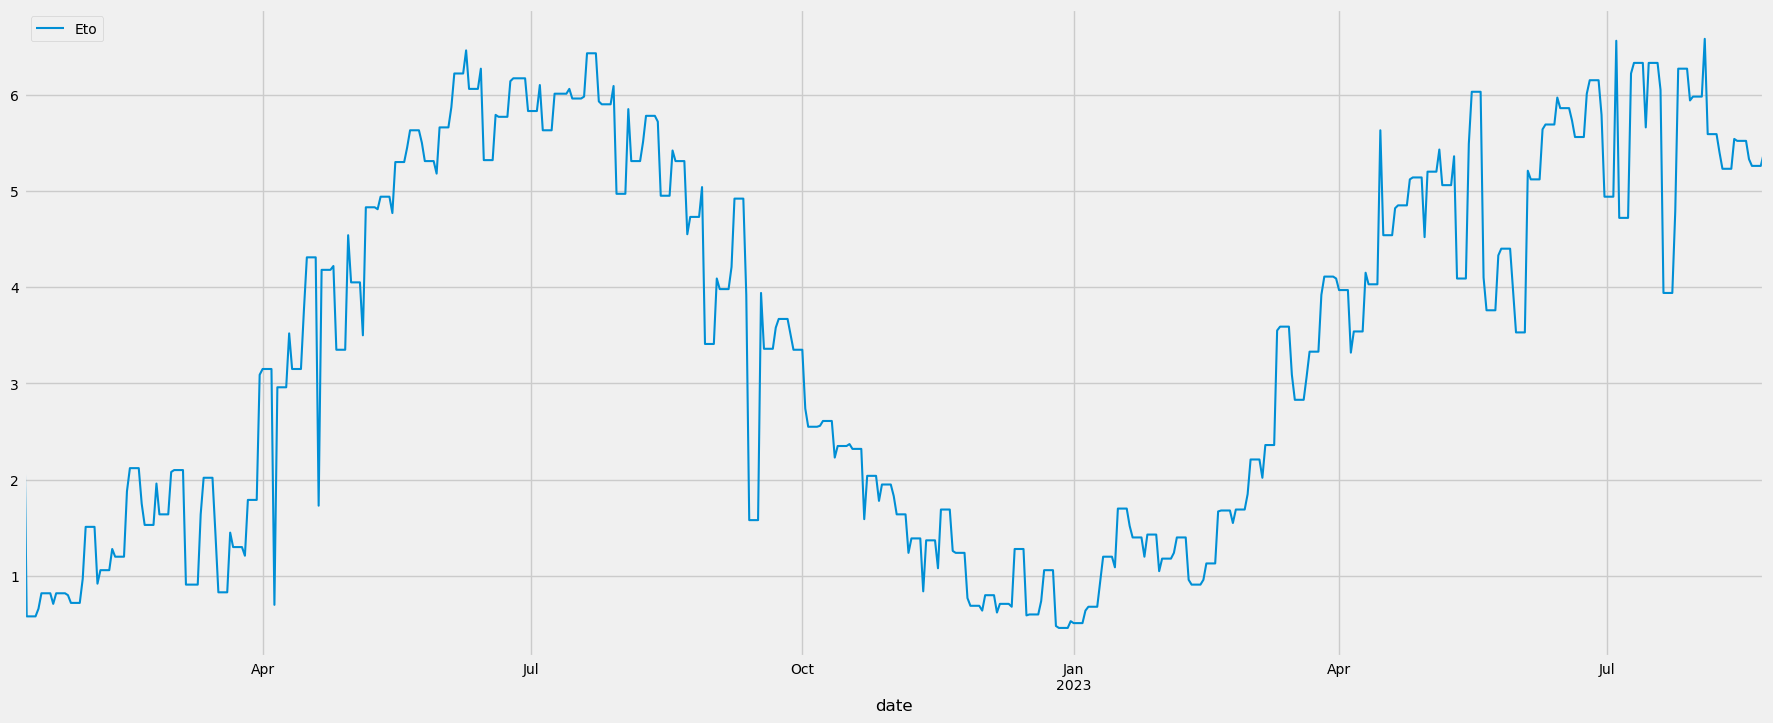

In [14]:
fig, ax = plt.subplots(figsize=(20, 8))
datos['eto'].plot(ax=ax, label='Eto')
#datos['ambiente'].plot(ax=ax, label='Ambiente')
#datos['nivel'].plot(ax=ax, label='Nivel')
ax.legend();

#COMENTAR ESTA LISTA PARA HACER EL ANÁLISIS CON LA PROPIA SERIE, Y NO CON LAS DIFERENCIAS
#datos = datos.diff().dropna()

In [15]:
#for name, column in datos.iteritems():
#    adfuller_test(column, name=column.name)
#    print('\n')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 561 entries, 2022-01-10 to 2023-07-24
Freq: D
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ndvi_mean   561 non-null    float64
 1   ndwi_mean   561 non-null    float64
 2   ndmi_mean   561 non-null    float64
 3   gndvi_mean  561 non-null    float64
 4   evi_mean    561 non-null    float64
 5   evi2_mean   561 non-null    float64
 6   savi_mean   561 non-null    float64
 7   eto         561 non-null    float64
dtypes: float64(8)
memory usage: 39.4 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2023-07-25 to 2023-08-23
Freq: D
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ndvi_mean   30 non-null     float64
 1   ndwi_mean   30 non-null     float64
 2   ndmi_mean   30 non-null     float64
 3   gndvi_mean  30 non-null     float64
 4   evi_mean    30 non-null     float64
 

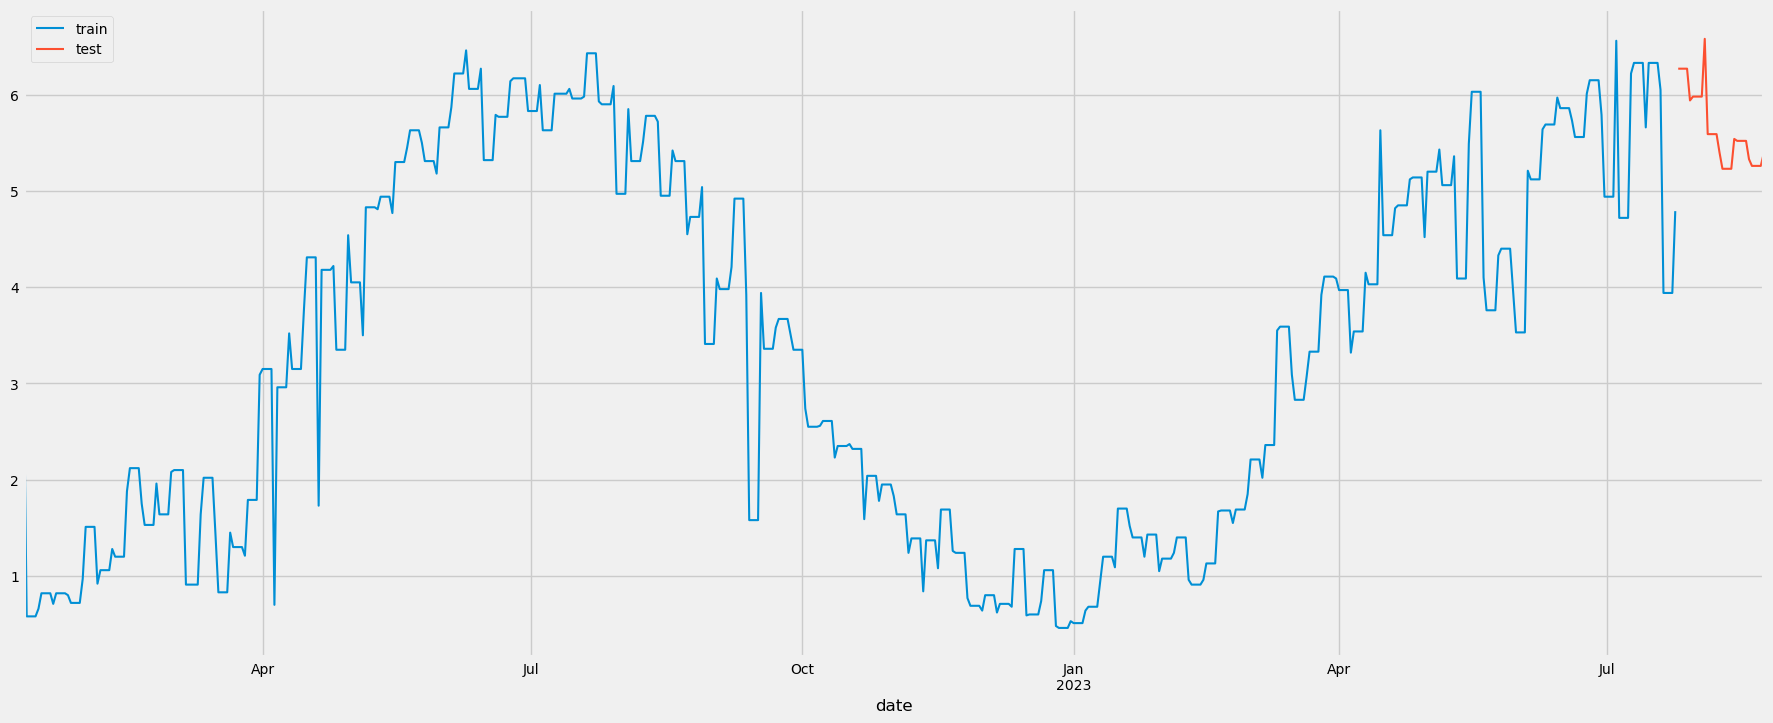

In [16]:
# Separación datos train-test
# ==============================================================================
steps = 30
df_train = datos[:-steps]
df_test  = datos[-steps:]

df_train.info()
df_test.info()

fig, ax = plt.subplots(figsize=(20, 8))
df_train['eto'].plot(ax=ax, label='train')
df_test['eto'].plot(ax=ax, label='test')
ax.legend();

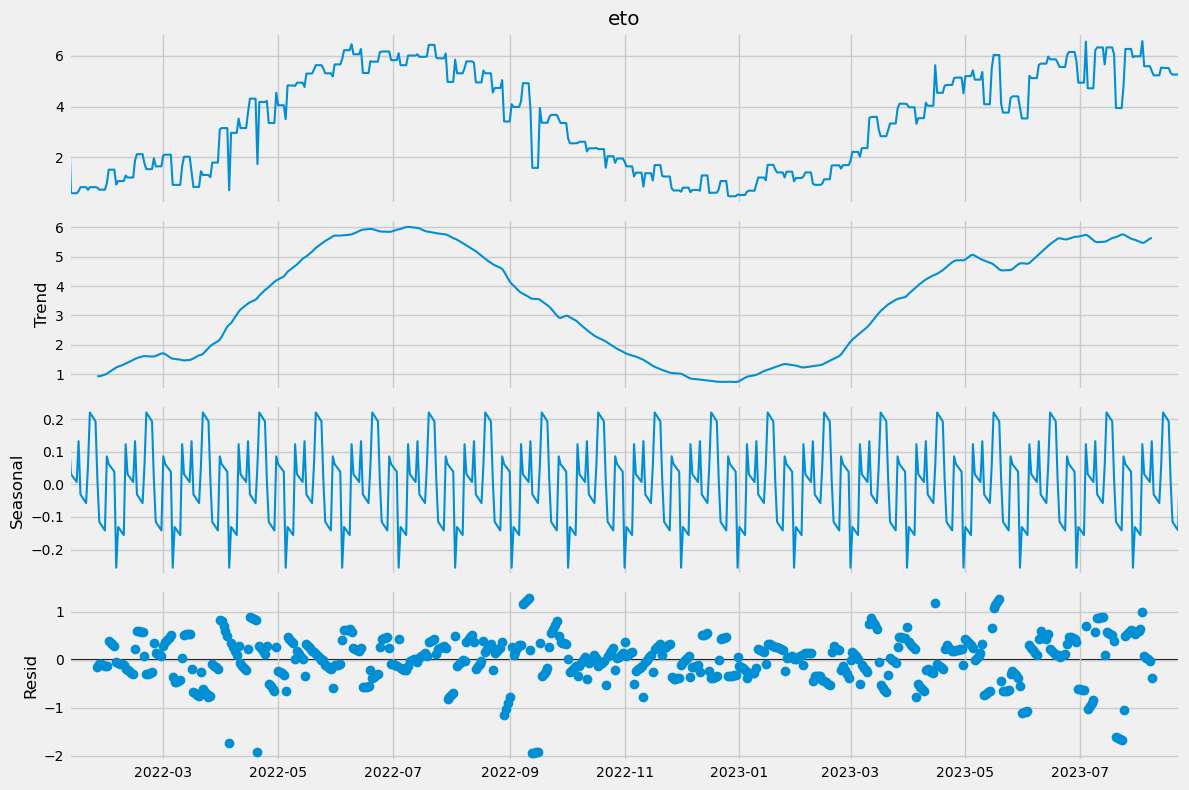

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose 
plt.rcParams["figure.figsize"] = (12,8)
a=seasonal_decompose(datos["eto"], model ="add", period=30)
a.plot();

In [18]:
#from pmdarima import auto_arima  
#modelo_auto=auto_arima(df_train['eto'],start_p=0,d=1,start_q=0,
#          max_p=4,max_d=2,max_q=4, m=24, seasonal=True,
#          error_action='warn',trace=True,
#          supress_warnings=True,stepwise=True,
#          random_state=20,n_fits=50)
#print(modelo_auto)

# 1. Autoregression (AR)

In [19]:
from statsmodels.tsa.ar_model import AutoReg
from random import random

def AR_model(train,test):
    # fit model
    model_AR = AutoReg(train["eto"], lags=30)
    model_AR_fit = model_AR.fit()
    # make prediction
    yhat=model_AR_fit.predict(len(train), len(train) + len(test) - 1)
    res=pd.DataFrame({"Pred":yhat, "ETO":test["eto"].values})
    return res
 
df_ret = AR_model(df_train, df_test)

Evaluation metric results:-
MSE: 1.161586535758546
MAE: 1.0503072623880163
RMSE: 1.0777692404956387
MAPE: 18.496130782073255
R2: -6.637684195096141



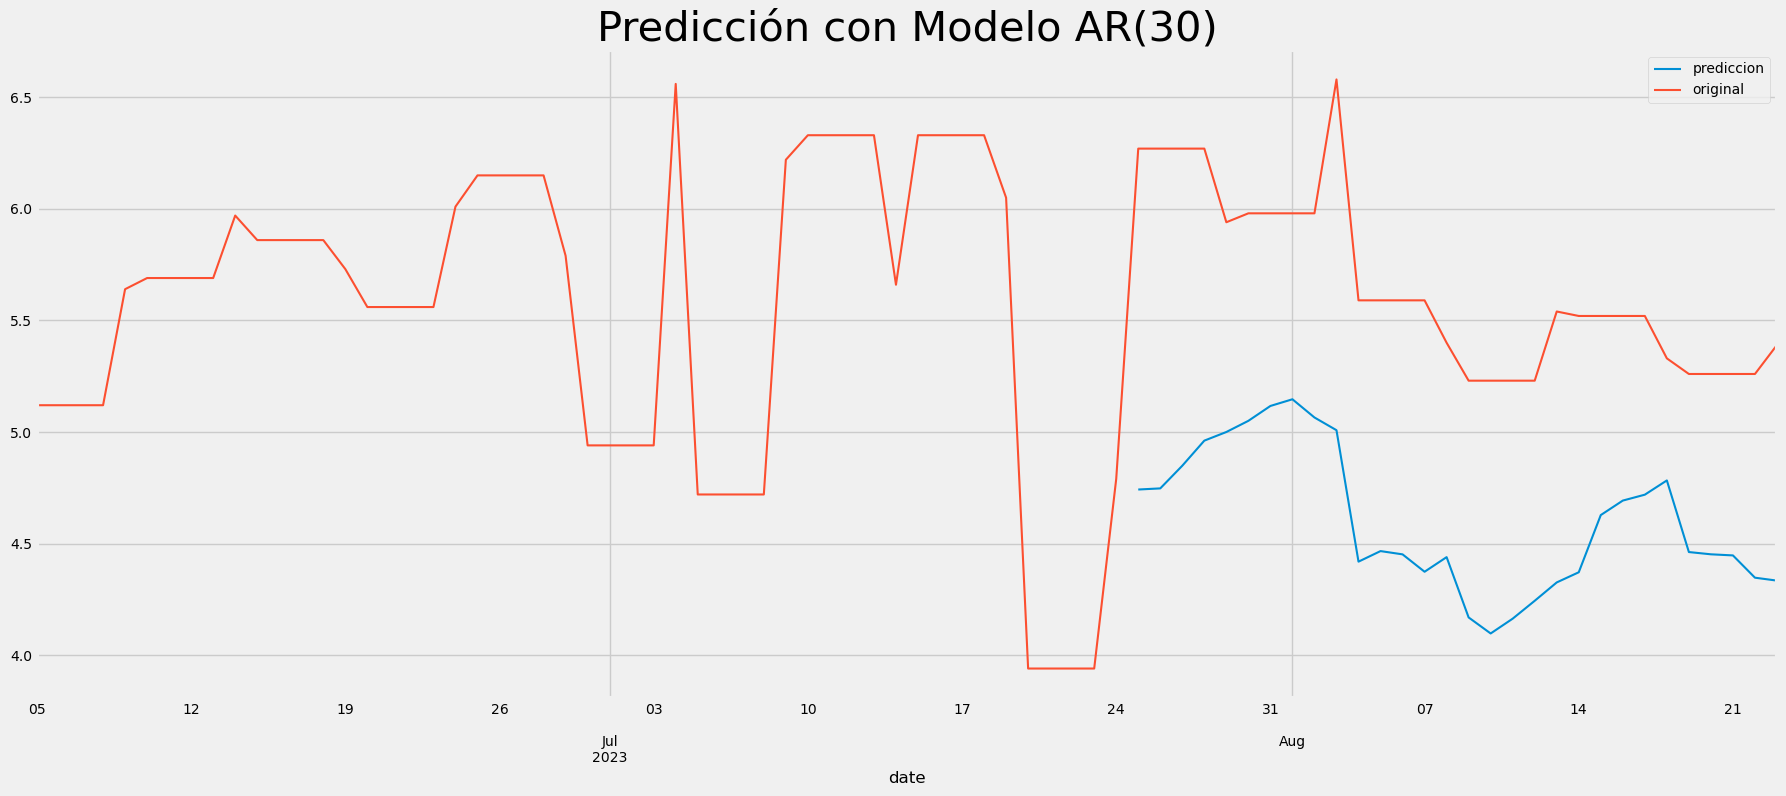

In [20]:
fig, ax = plt.subplots(figsize=(20, 8))
plt.title("Predicción con Modelo AR(30)", fontsize=30);
#df_train['temperatura'].plot(ax=ax, label='train')
df_ret['Pred'].plot(ax=ax, label='prediccion')
datos["eto"].tail(50+steps).plot(ax=ax, label='original')
ax.legend();

evaluacion_metrica(df_test['eto'],df_ret['Pred'])

# 2. Seasonal Autoregressive Integrated Moving-Average (SARIMA)

In [21]:
#from pmdarima import auto_arima   

#modelo_auto=auto_arima(df_train["eto"],start_p=0,d=0,tart_q=0,
#          max_p=4,max_d=2,max_q=4, m=30, seasonal=True,
#          error_action='warn',trace=True,
#          supress_warnings=True,stepwise=True,
#          random_state=20,n_fits=50)

#print(modelo_auto)

In [22]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random

def SARIMA_model(train,test):
    # fit model
    model_ARIMA = SARIMAX(train['eto'], order=(3, 0, 2), seasonal_order=(0,0,0,30))
    model__ARIMA_fit = model_ARIMA.fit(disp=False)
    # make prediction
    yhat = model__ARIMA_fit.predict(len(train), len(train) + len(test) -1 )
    res=pd.DataFrame({"Pred":yhat, "Act":test["eto"].values})
    return res

df_ret = SARIMA_model(df_train, df_test)

C:\Users\Martinejo\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Martinejo\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Martinejo\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation metric results:-
MSE: 1.4257055610498939
MAE: 1.1487877568787097
RMSE: 1.1940291290625593
MAPE: 20.04392626087199
R2: -8.374324249876565



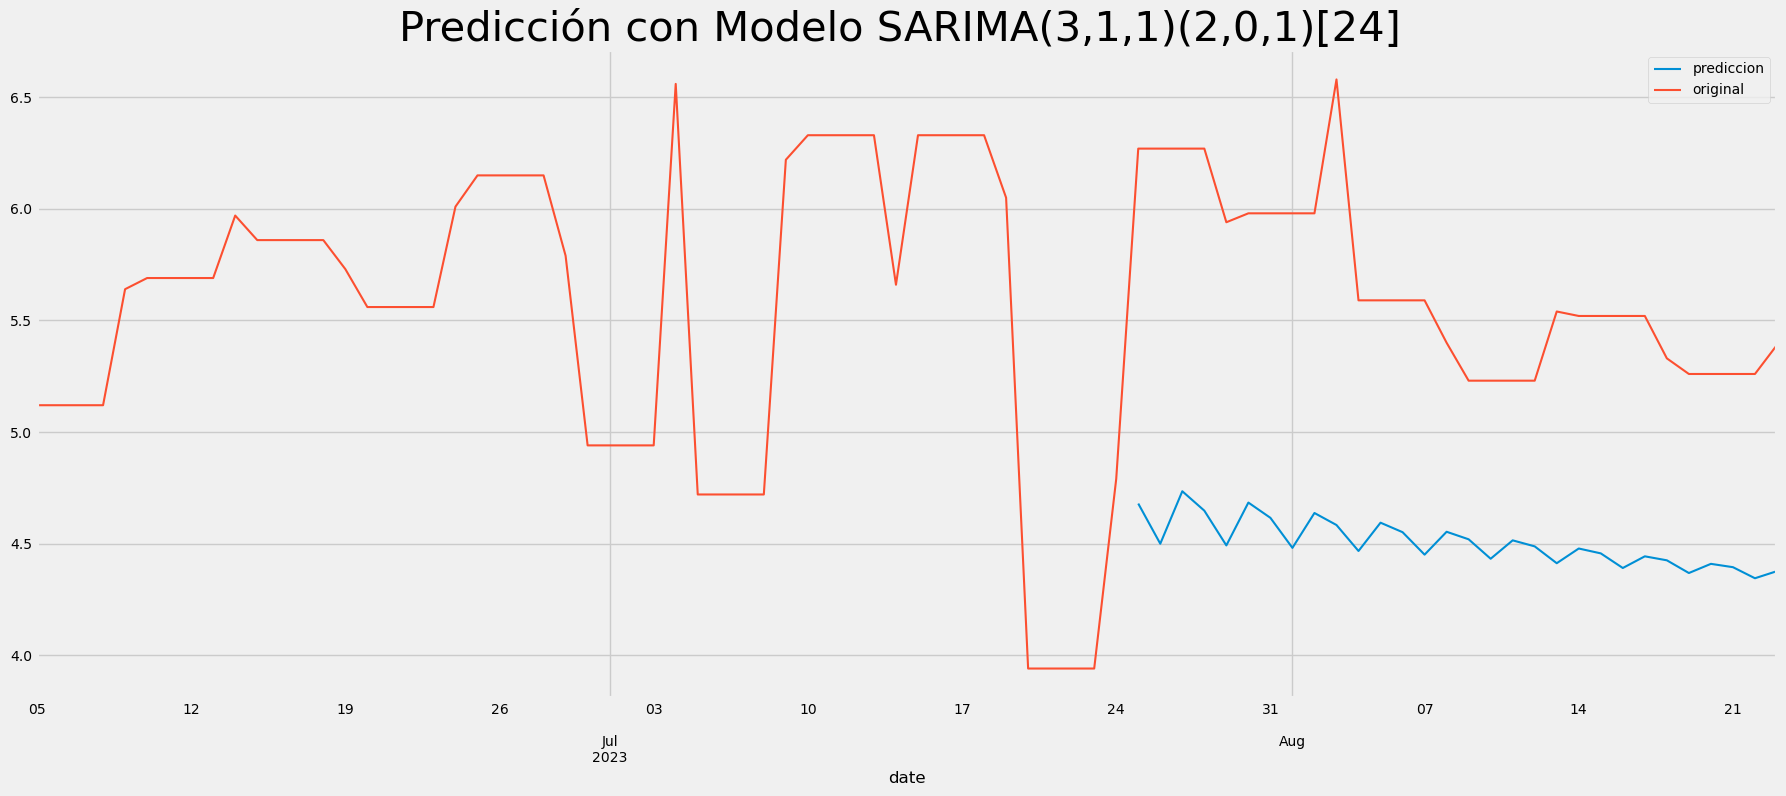

In [23]:
fig, ax = plt.subplots(figsize=(20, 8))
plt.title("Predicción con Modelo SARIMA(3,1,1)(2,0,1)[24] ", fontsize=30);
#df_train['temperatura'].plot(ax=ax, label='train')
df_ret['Pred'].plot(ax=ax, label='prediccion')
datos["eto"].tail(50+steps).plot(ax=ax, label='original')
ax.legend();

evaluacion_metrica(y_true = df_test['eto'],y_pred = df_ret['Pred'])

## LSTM

1/1 [==============================] - 0s 15ms/step - loss: 0.0047
Fold 1 - Test Loss: 0.004697537515312433
1/1 [==============================] - 0s 132ms/step
Fold 1 - MSE: 0.17594355716734936
Fold 1 - MAE: 0.33239414850870763


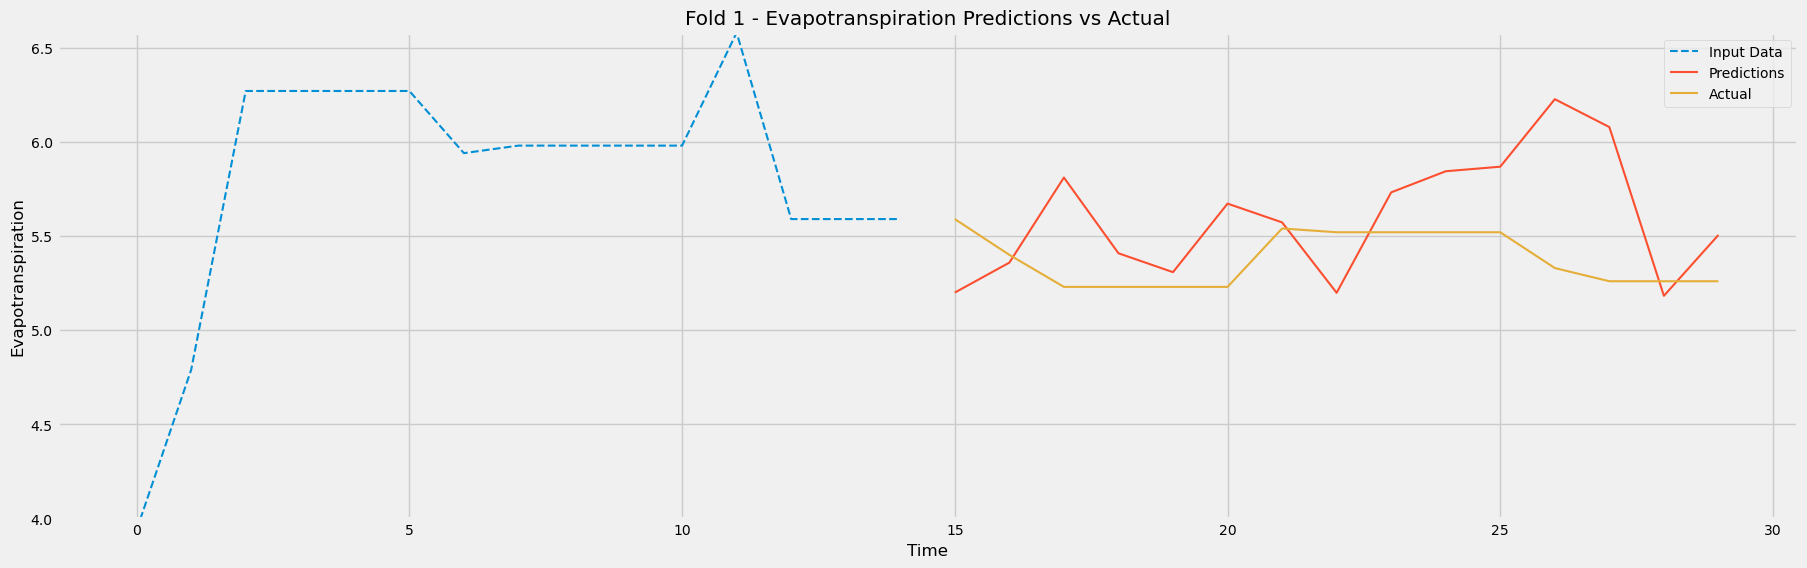

1/1 [==============================] - 0s 15ms/step - loss: 0.0082
Fold 2 - Test Loss: 0.008243393152952194
1/1 [==============================] - 0s 14ms/step
Fold 2 - MSE: 0.308751632620593
Fold 2 - MAE: 0.5169414800008142


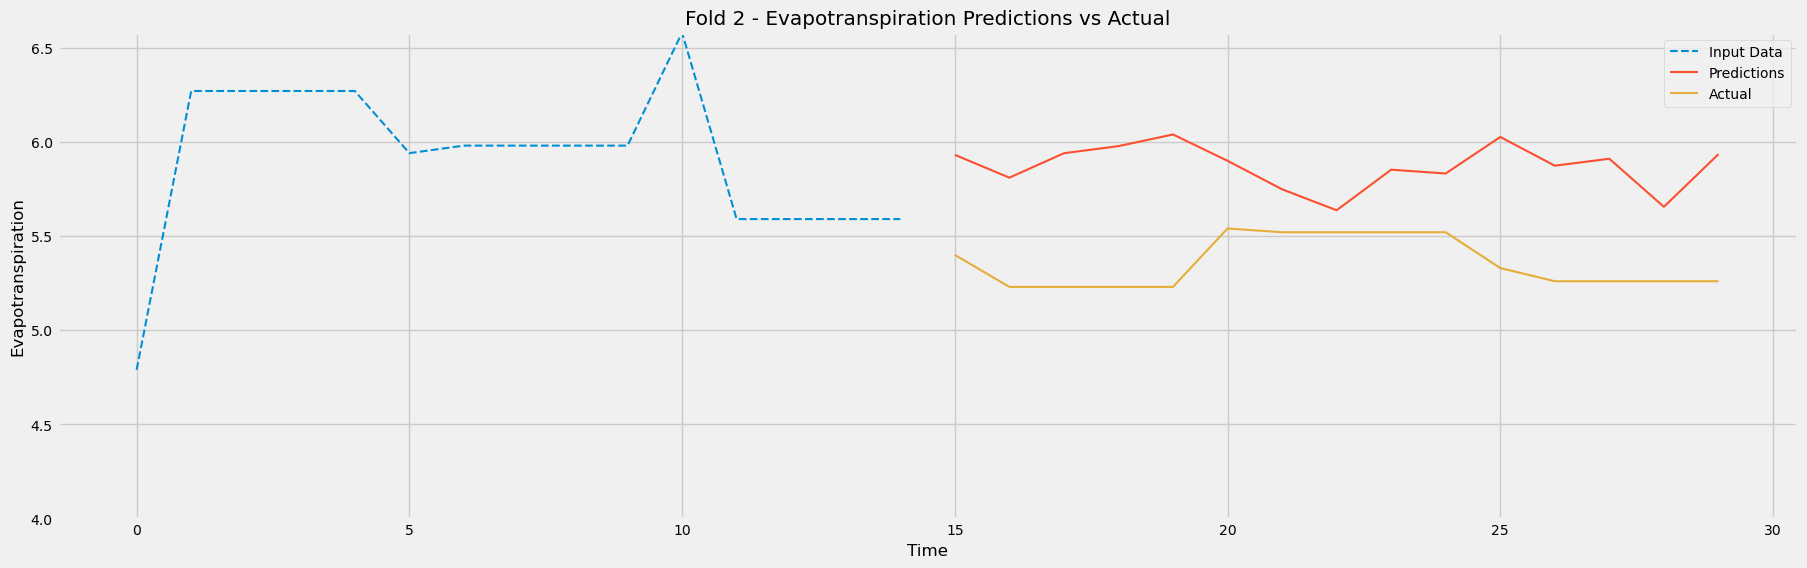

1/1 [==============================] - 0s 16ms/step - loss: 0.0099
Fold 3 - Test Loss: 0.009917017072439194
1/1 [==============================] - 0s 14ms/step
Fold 3 - MSE: 0.3714361801752165
Fold 3 - MAE: 0.5998357264200851


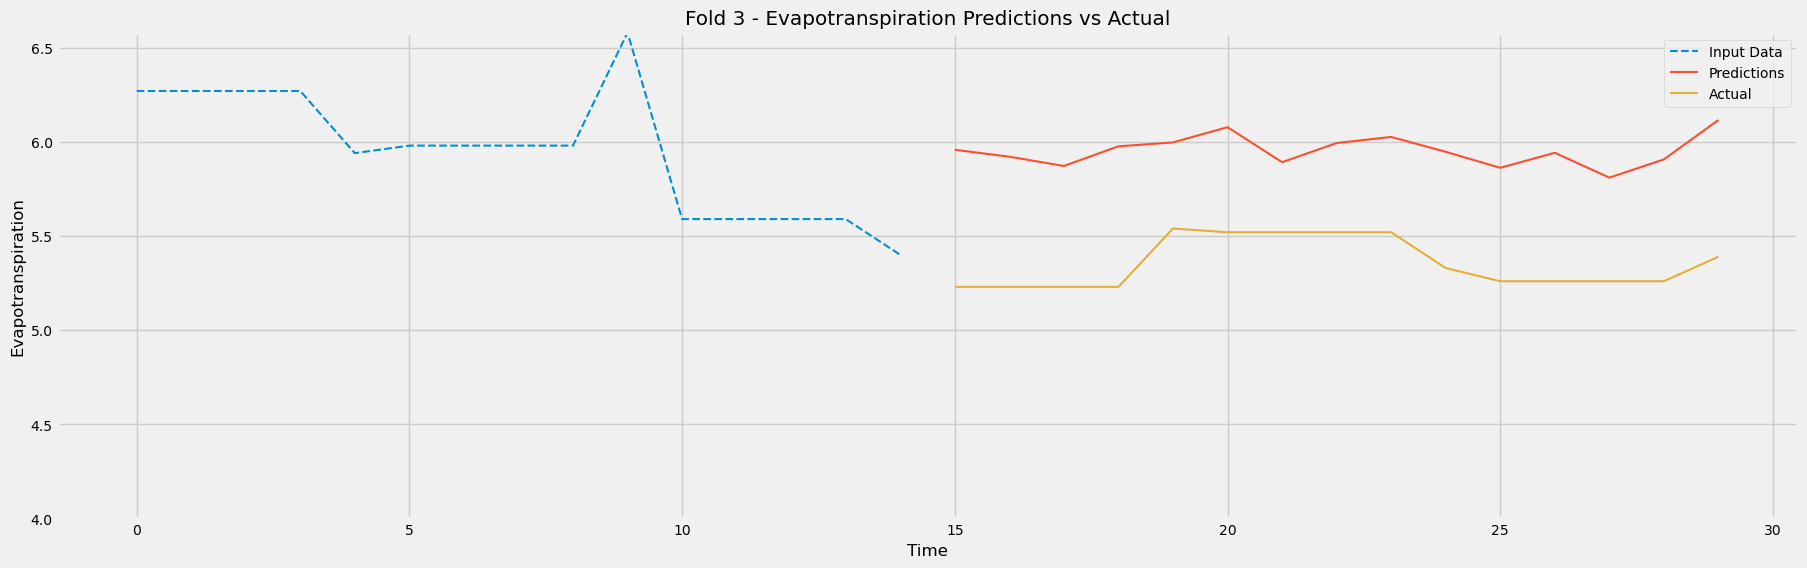

Average MSE: 0.285377123321053
Average MAE: 0.4830571183098689


In [24]:
df = datos.copy()

num_features = df.shape[1]

# interpolate missing values
df = df.interpolate(method='linear', axis=0)

# remove all nan values
df = df.dropna()

# Get the minimum and maximum values of 'eto'
min_et = df['eto'].min()
max_et = df['eto'].max()

# Normalize data
scaled_data = df[df.columns].values

scalers = {}
for column in df.columns:
    scalers[column] = MinMaxScaler(feature_range=(0, 1))
    scaled_data[:, df.columns.get_loc(column)] = scalers[column].fit_transform(scaled_data[:, df.columns.get_loc(column)].reshape(-1, 1)).flatten()

# Prepare input and output sequences
n_days = 15  # Number of days in each sequence
X = []
y = []
for i in range(n_days, len(df) - n_days + 1):
    X.append(scaled_data[i-n_days:i])
    y.append(scaled_data[i:i+n_days, df.columns.get_loc('eto')])  # Output sequence with 7 days of Evapotranspiration


X = np.array(X)
y = np.array(y)

# Define the callbacks
early_stopping = EarlyStopping(patience=10, monitor='val_loss', mode='min', restore_best_weights=True)
# model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')
lr_scheduler = LearningRateScheduler(lambda epoch: 0.001 * 0.9 ** epoch)  # Example learning rate scheduler


# Define LSTM model
model = keras.Sequential()
model.add(keras.layers.LSTM(32, activation='relu', input_shape=(n_days, X.shape[2])))
model.add(keras.layers.Dense(n_days))
model.compile(optimizer='adam', loss='mean_squared_error')

# Apply TimeSeriesSplit for cross-validation
mse_scores = []
mae_scores = []
tscv = TimeSeriesSplit(n_splits=3, test_size=1)  # Assuming you want to split the data into 5 folds
for fold, (train_index, test_index) in enumerate(tscv.split(X), 1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping, lr_scheduler], verbose=0)

    # Evaluate the model
    loss = model.evaluate(X_test, y_test)
    print(f"Fold {fold} - Test Loss: {loss}")

    # Make predictions
    predictions = model.predict(X_test)

    # Inverse transform the predictions and actual values
    inv_predictions = scalers['eto'].inverse_transform(predictions).flatten()
    inv_actual = scalers['eto'].inverse_transform(y_test).flatten()
    inv_input = scalers['eto'].inverse_transform(X_test[:, :, df.columns.get_loc('eto')].reshape(1, -1)).flatten()

    # Calculate MSE
    mse = mean_squared_error(inv_actual, inv_predictions)
    mse_scores.append(mse)
    print(f"Fold {fold} - MSE: {mse}")

    # Calculate MAE
    mae = np.mean(np.abs(inv_actual - inv_predictions))
    mae_scores.append(mae)
    print(f"Fold {fold} - MAE: {mae}")

    # Plot predictions, actual values, and input data
    plt.figure(figsize=(20, 6))
    plt.plot(np.arange(len(inv_input)), inv_input, label='Input Data', linestyle='--')
    plt.plot(np.arange(len(inv_input), len(inv_input) + len(inv_actual)),                    , label='Predictions')
    plt.plot(np.arange(len(inv_input), len(inv_input) + len(inv_actual)), inv_actual, label='Actual')
    plt.xlabel('Time')
    plt.ylabel('Evapotranspiration')
    plt.title(f'Fold {fold} - Evapotranspiration Predictions vs Actual')
    plt.ylim(4, max_et)  # Set y-axis limits
    plt.legend()
    plt.show()

# Calculate average MSE across all splits
print(f"Average MSE: {np.mean(mse_scores)}")
print(f"Average MAE: {np.mean(mae_scores)}")